# Employee Data Analysis

In [44]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Load the dataset
df = pd.read_csv('myexcel - myexcel.csv.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### EXPLORE & CLEAN THE DATA

In [46]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [47]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [48]:
#Replace the incorrect height values with random numbers between 150 and 180
df['Height']=np.random.randint(150,181,size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,179,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,155,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,166,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,159,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,172,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,175,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,165,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,155,231,Kansas,947276.0


In [49]:
df.shape

(458, 9)

In [50]:
#For Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB


In [51]:
#Check for any missing value 
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [52]:
#Replace the null value by zero
df.replace(np.nan,"0",inplace=True)

In [53]:
#Check for any missing value 
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [54]:
#Check for any duplicates
df.duplicated().sum()

0

In [55]:
#check datatype of the column salary
df['Salary'].dtype

dtype('O')

In [56]:
#Convert datatype of salary to float
df['Salary']=df['Salary'].astype(np.float64)

In [57]:
df['Salary']

0      7730337.0
1      6796117.0
2            0.0
3      1148640.0
4      5000000.0
         ...    
453    2433333.0
454     900000.0
455    2900000.0
456     947276.0
457     947276.0
Name: Salary, Length: 458, dtype: float64

### ANALYSING THE DATA

In [58]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [59]:
# Number of unique values in each column
df.nunique()

Name        458
Team         30
Number       53
Position      5
Age          22
Height       31
Weight       87
College     119
Salary      310
dtype: int64

In [60]:
df.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [61]:
df.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [62]:
df.College.unique()

array(['Texas', 'Marquette', 'Boston University', 'Georgia State', '0',
       'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State',
       'Washington', 'Kentucky', 'North Carolina', 'Arizona',
       'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse',
       'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M', 'UCLA', 'UNLV',
       'Wichita State', "Saint Joseph's", 'Notre Dame', 'Norfolk State',
       'Duke', 'Murray State', 'Tennessee State', 'Bowling Green',
       'Purdue', 'Wake Forest', 'Michigan', 'Missouri', 'USC',
       'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson', 'Vanderbilt',
       'Michigan State', 'Florida', 'Washington State', 'Arizona State',
       'Oklahoma', 'Wyoming', "St. John's", 'Maryland', 'Wisconsin',
       'Utah Valley', 'North Carolina State', 'UC Santa Barbara',
       'Baylor', 'Connecticut', 'Oregon State', 'New Mexico', 'Oregon',
       'Creighton', 'Arkansas', 'Memphis', "Saint Mary's", 'Tennessee',
       'Alabama'

In [63]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,179,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,155,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,166,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,159,231,0,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,175,240,0,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,169,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,176,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,165,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,157,220,Oklahoma State,3431040.0


In [64]:
df.tail(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
448,Gordon Hayward,Utah Jazz,20,SF,26,157,226,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5,SG,23,158,206,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2,SF,28,167,226,0,2050000.0
451,Chris Johnson,Utah Jazz,23,SF,26,175,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,167,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,172,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,175,179,0,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,165,256,0,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,155,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,152,231,Kansas,947276.0


In [65]:
df.drop('Number',axis=1,inplace=True)
df

,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25,179,235,Marquette,6796117.0
2,John Holland,Boston Celtics,SG,27,155,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,SG,22,166,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29,159,231,0,5000000.0
...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,PG,26,172,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,PG,24,175,179,0,900000.0
455,Tibor Pleiss,Utah Jazz,C,26,165,256,0,2900000.0
456,Jeff Withey,Utah Jazz,C,26,155,231,Kansas,947276.0


In [66]:
df['Salary'].value_counts()

Salary
947276.0     32
845059.0     18
525093.0     13
0.0          11
981348.0      6
             ..
2100000.0     1
1252440.0     1
2891760.0     1
3272091.0     1
900000.0      1
Name: count, Length: 310, dtype: int64

In [67]:
df.describe()

,Age,Height,Weight,Salary
count,458.000000,458.000000,458.000000,4.580000e+02
mean,26.934498,164.938865,221.543668,4.717870e+06
std,4.400128,9.000886,26.343200,5.216222e+06
min,19.000000,150.000000,161.000000,0.000000e+00
25%,24.000000,157.000000,200.000000,1.000000e+06
50%,26.000000,165.000000,220.000000,2.647980e+06
75%,30.000000,173.000000,240.000000,6.323553e+06
max,40.000000,180.000000,307.000000,2.500000e+07


In [68]:
df.describe(include='all')

,Name,Team,Position,Age,Height,Weight,College,Salary
count,458,458,458,458.000000,458.000000,458.000000,458,4.580000e+02
unique,458,30,5,NaN,NaN,NaN,119,NaN
top,Avery Bradley,New Orleans Pelicans,SG,NaN,NaN,NaN,0,NaN
freq,1,19,102,NaN,NaN,NaN,84,NaN
mean,NaN,NaN,NaN,26.934498,164.938865,221.543668,NaN,4.717870e+06
std,NaN,NaN,NaN,4.400128,9.000886,26.343200,NaN,5.216222e+06
min,NaN,NaN,NaN,19.000000,150.000000,161.000000,NaN,0.000000e+00
25%,NaN,NaN,NaN,24.000000,157.000000,200.000000,NaN,1.000000e+06
50%,NaN,NaN,NaN,26.000000,165.000000,220.000000,NaN,2.647980e+06
75%,NaN,NaN,NaN,30.000000,173.000000,240.000000,NaN,6.323553e+06


In [69]:
# Employees count in each team
df['Team'].value_counts()

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [70]:
len(df)

458

In [71]:
# Percentage of employees in each team
(df['Team'].value_counts()/458)*100

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

In [72]:
# Segregate employees based on positions
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [73]:

df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [74]:
# Most Common Age group
(pd.cut(df['Age'],bins=[10,20,30,40],labels=['10-20','20-30','30-40'])).value_counts()


Age
20-30    346
30-40     91
10-20     21
Name: count, dtype: int64

In [75]:
#Team and Position with Highest Salary Spending
df.groupby(['Team','Position'])['Salary'].sum().idxmax()

('Los Angeles Lakers', 'SF')

In [76]:
#Correlation Between Age and Salary
corrltn=df[['Age','Salary']].corr()

### VISUALIZATION OF DATA

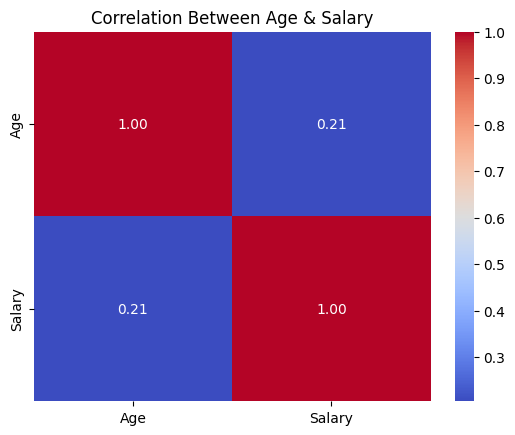

In [77]:
#Plot the correlation heatmap
sns.heatmap(corrltn,annot=True,cmap='coolwarm',fmt=".2f")

#Add title
plt.title('Correlation Between Age & Salary')
plt.show()

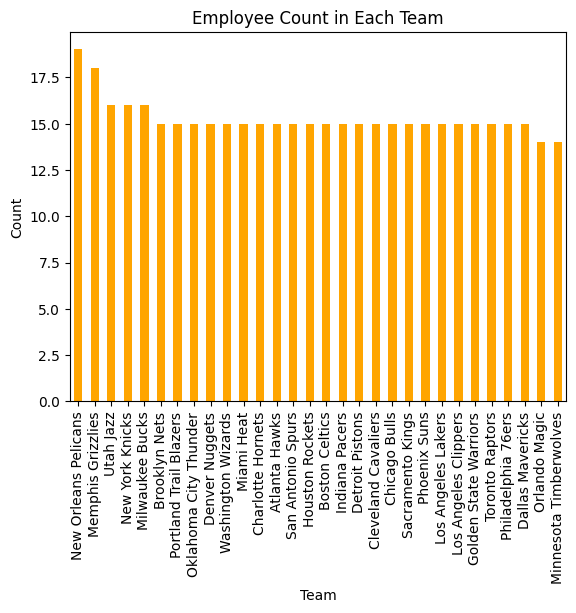

In [78]:
# Calculate the count of employee in each team.
team_counts=df['Team'].value_counts()

#Plot the bar diagram
team_counts.plot(kind='bar',color='orange')

# Add title and label 
plt.title('Employee Count in Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

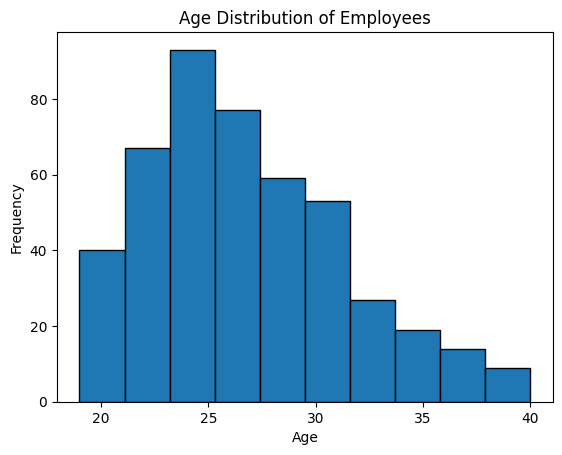

In [79]:
#the Column Age in the Dataset
age=df['Age']

#plot the Histogram
plt.hist(age,edgecolor='black')

#Add Title & labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.show()


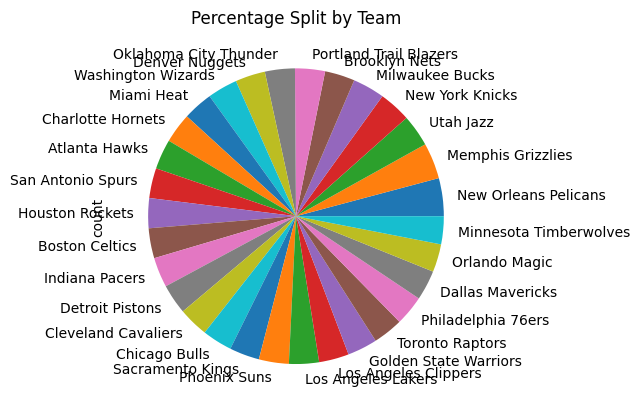

In [80]:
#plot Pie chart
team_counts.plot(kind='pie')

#Add Title
plt.title('Percentage Split by Team')
plt.show()

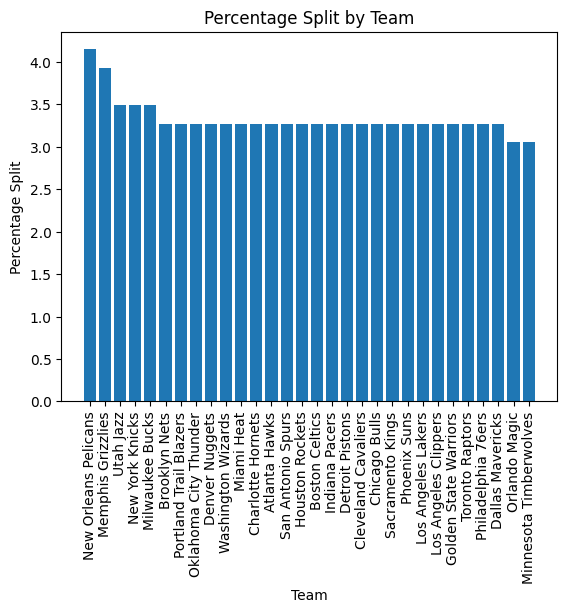

In [83]:
#Calculate the percentage of employees in each team
percent_split = (team_counts/458)*100

#Create bar plot
plt.bar(percent_split.index,percent_split)

#Add labels and title
plt.xlabel('Team')
plt.ylabel('Percentage Split')
plt.title('Percentage Split by Team')
plt.xticks(rotation=90)

plt.show()

In [ ]:
#Calculate the count of Employees based on positions
position_counts=df['Position'].value_counts()

#plot the Bar chart
position_counts.plot(kind= 'bar',color='green')

#Add title & lables
plt.title('Employee Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')

plt.show()

In [ ]:
#The column Age in the Data
age_data=df['Age']

#plot the histogram
plt.hist(age_data,bins=20,edgecolor='black',color='pink')

#Add title & labels
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


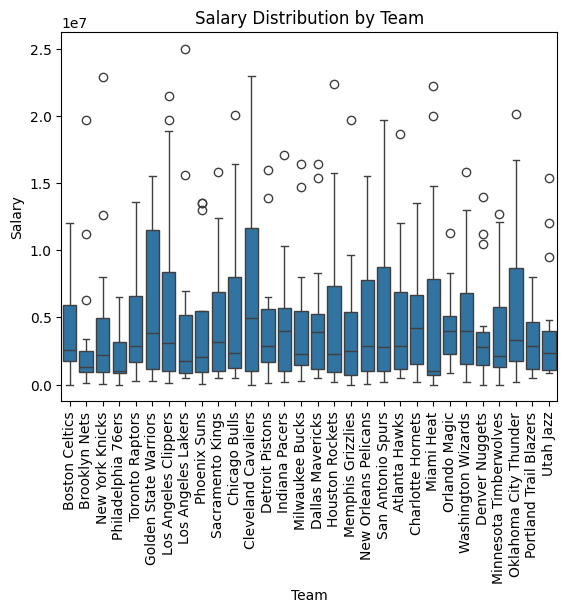

In [84]:
#Plot the Boxplot
sns.boxplot(x='Team',y='Salary',data=df)

#Add title & labels
plt.title('Salary Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Salary')
plt.xticks(rotation=90)

plt.show()


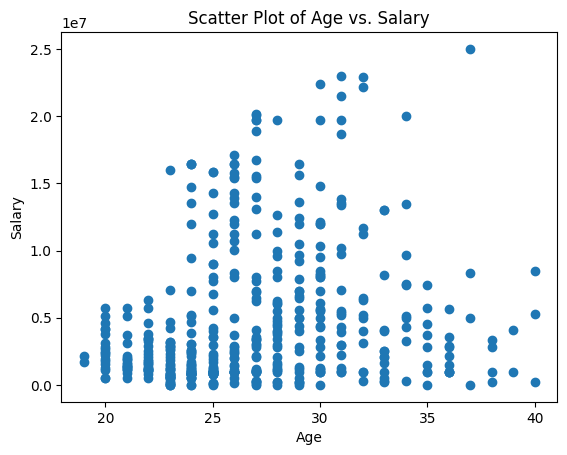

In [85]:
# Plot the Scatter plot
plt.scatter(df['Age'],df['Salary'])

# Add title & labels
plt.title('Scatter Plot of Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

plt.show()

In conclusion,
While considering data
*  Highest number of employees in the Team is 'New Orleans Pelicans' with respect to the other team.
*  The most number of employees are belongs to 'SG' Position(102 Employees),
   Second position belongs to 'PF' Position(100 Employees), and
   least number of employees belongs to 'C' Position.
*  Most employees are belongs to the age group of 20 - 30 years.
*  The team 'Los Angels Lakers' and 'SF' Position are spending more in terms of salary.
*  The employees in the age group of 30-40 years have the highest salary.
   